 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import yfinance as yf

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path(r"C:\Users\goshl\OneDrive\Documents\fIN_Tech\uw-fintech-spring-21-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
read_whale_path = pd.read_csv(whale_path,index_col="Date", infer_datetime_format=True,parse_dates=True)

In [3]:

read_whale_path.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [4]:
# Count nulls
read_whale_path.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
read_whale_path.shape

(1060, 4)

In [6]:
# Drop nulls
whale_data = read_whale_path.dropna()
print(whale_data.shape)
#print(read_whale_path.isnull().sum())
whale_data.head()

(1059, 4)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algorithmic_path = Path(r"C:\Users\goshl\OneDrive\Documents\fIN_Tech\uw-fintech-spring-21-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
read_algorithmic_path = pd.read_csv(algorithmic_path,index_col="Date", infer_datetime_format=True,parse_dates=True)
read_algorithmic_path.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
read_algorithmic_path.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algorithmic_data = read_algorithmic_path.dropna()
print(algorithmic_data.shape)
print(algorithmic_data.isnull().sum())

(1235, 2)
Algo 1    0
Algo 2    0
dtype: int64




## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp_path = Path(r"C:\Users\goshl\OneDrive\Documents\fIN_Tech\uw-fintech-spring-21-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
read_sp_path = pd.read_csv(sp_path,index_col="Date", infer_datetime_format=True,parse_dates=True )
read_sp_path.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [11]:
# Check Data Types
read_sp_path.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
read_sp_path["Close"]=read_sp_path["Close"].str.replace("$","")
read_sp_path["Close"]=read_sp_path["Close"].astype("float")
read_sp_path.dtypes

Close    float64
dtype: object

In [13]:
#calculate daily return
#daily_return = (read_sp_path - read_sp_path.shift(1) / read_sp_path.shift(1)
#daily_return.head(1)
daily_return= read_sp_path.pct_change()
daily_return.head(10)


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038


In [20]:
# Drop nulls
#whale_data = read_whale_path.dropna()
daily_return_pct_sp500 = daily_return.dropna()
daily_return_pct_sp500["SP_Close"]=daily_return_pct_sp500["Close"]
daily_return_pct_sp=daily_return_pct_sp500.drop(["Close"], axis=1)
daily_return_pct_sp.head()
#daily_return_pct_sp

<ipython-input-20-f39f23180813>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_return_pct_sp500["SP_Close"]=daily_return_pct_sp500["Close"]


,SP_Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [21]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_datas = pd.concat([daily_return_pct_sp,read_whale_path, read_algorithmic_path ], axis = 'columns', join = "inner")
combined_data = combined_datas.dropna()

combined_data

,SP_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-22,-0.008764,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-18,-0.001011,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-17,-0.001577,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-16,0.002279,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-15,-0.000509,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572
...,...,...,...,...,...,...,...
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

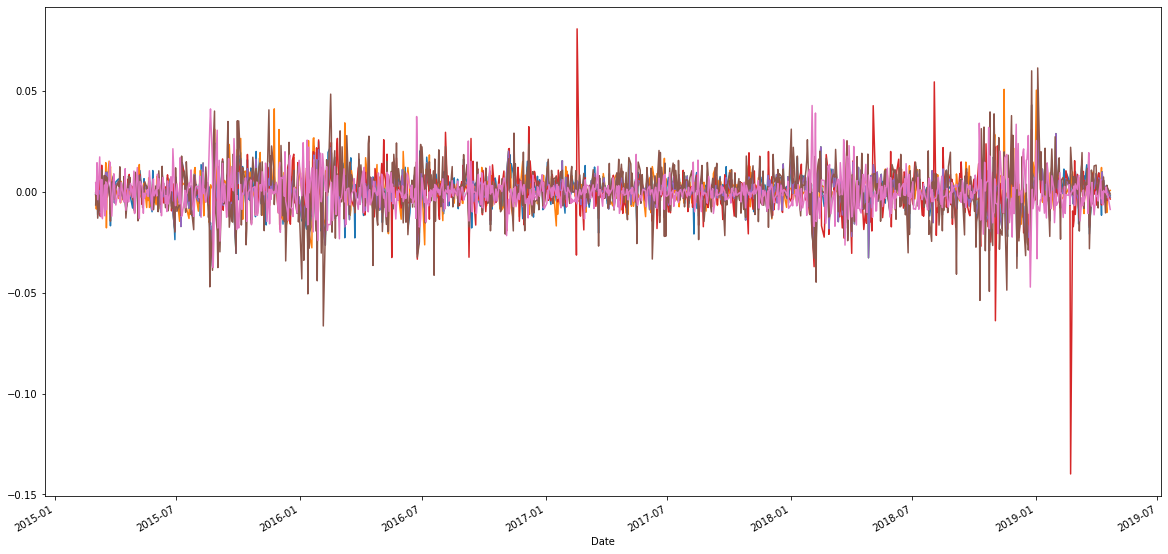

In [24]:
# Plot daily returns of all portfolios combined_data["Algo 1"].plot()
combined_data["Algo 2"].plot(figsize=(20,10))
combined_data["Algo 1"].plot(figsize=(20,10))

#SOROS FUND MANAGEMENT LLC	PAULSON & CO.INC.	TIGER GLOBAL MANAGEMENT LLC	BERKSHIRE HATHAWAY INC daily_return_pct_sp
combined_data["SOROS FUND MANAGEMENT LLC"].plot(figsize=(20,10))
combined_data["TIGER GLOBAL MANAGEMENT LLC"].plot(figsize=(20,10))
combined_data["SOROS FUND MANAGEMENT LLC"].plot(figsize=(20,10))
combined_data["BERKSHIRE HATHAWAY INC"].plot(figsize=(20,10))
combined_data["SP_Close"].plot(figsize=(20,10)) 
#"daily_return"].plot()



#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

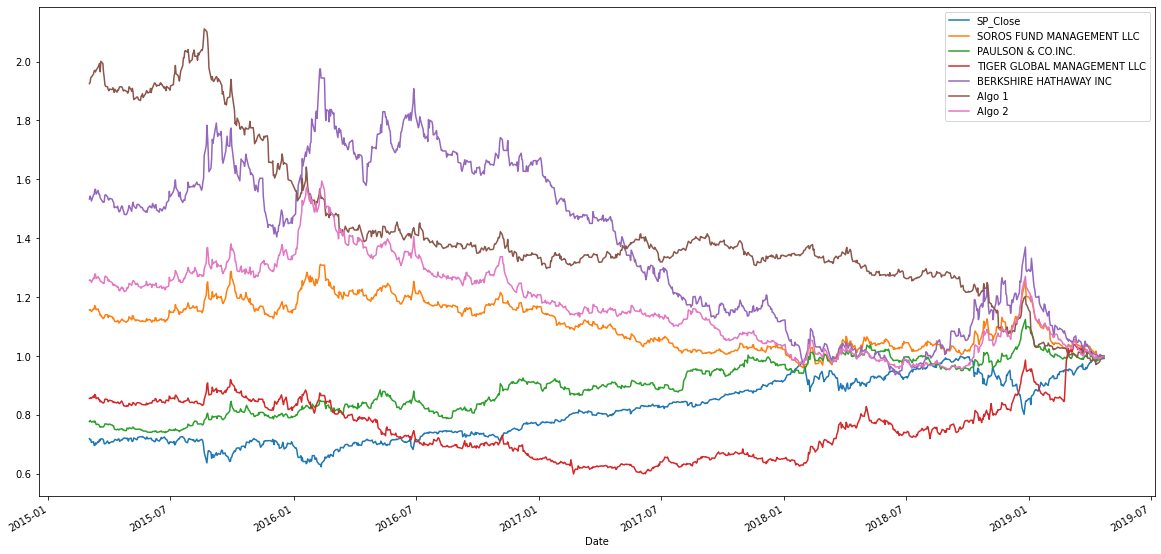

In [25]:
# Calculate cumulative returns of all portfolios
#weights = [0.5, 0.5]
#portofolio_return = All_Return.dot(weights)
cumulative_return = (1 + combined_data).cumprod()
cumulative_return.plot(figsize=(20,10))

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


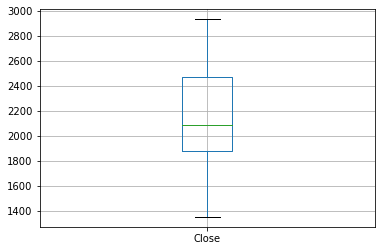

In [26]:

p1 = read_sp_path.boxplot()




<AxesSubplot:>

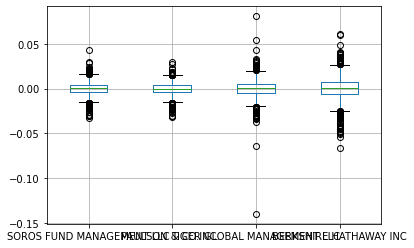

In [27]:
read_whale_path.boxplot()

<AxesSubplot:>

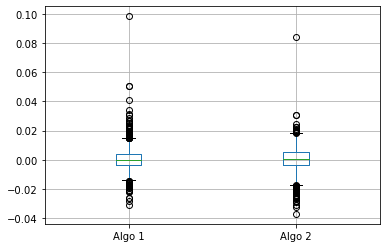

In [28]:
read_algorithmic_path.boxplot()

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
daily_standard_deviations_of_all_portfolios=combined_data.std()
daily_standard_deviations_of_all_portfolios


SP_Close                       0.008587
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculate  the daily standard deviation of S&P 500
daily_standard_deviation_of_SP_500 = daily_return_pct_sp.std()
print(daily_standard_deviation_of_SP_500)

# Determine which portfolios are riskier than the S&P 500
daily_standard_deviations_of_all_portfolios = daily_standard_deviations_of_all_portfolios.sort_values(ascending=False)
daily_standard_deviations_of_all_portfolios.head(10)





SP_Close    0.008135
dtype: float64


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP_Close                       0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [31]:
print("High volatility more risk, therefore BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are more riskier than Sand P 500")

High volatility more risk, therefore BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are more riskier than Sand P 500


### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
anaul_std = daily_standard_deviations_of_all_portfolios*np.sqrt(252)
anaul_std.head(10)



BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP_Close                       0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

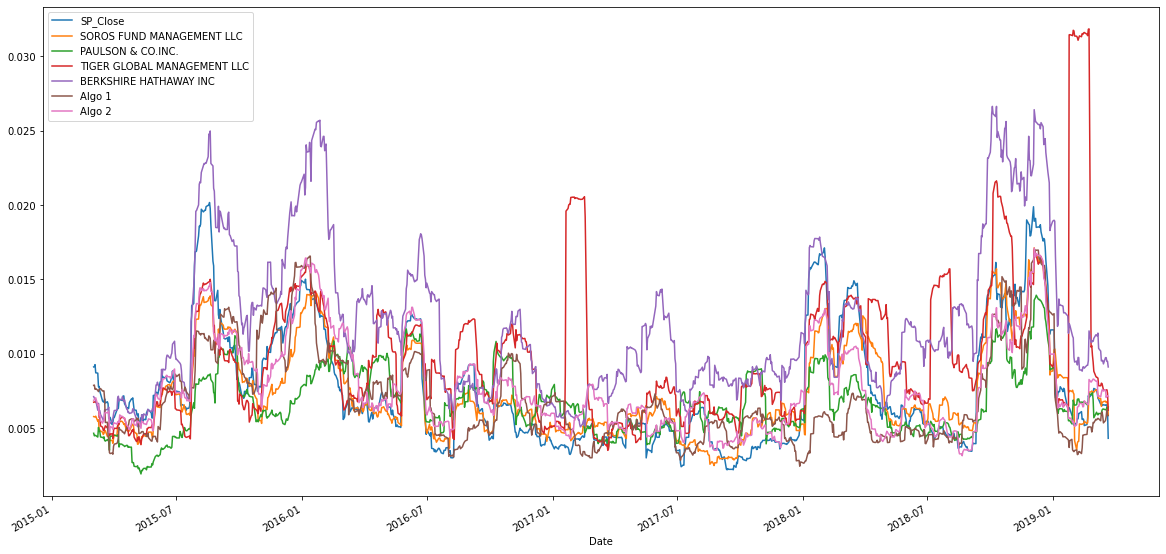

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21=combined_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [34]:
# Calculate the correlation
correlation = combined_data.corr()
# Display de correlation matrix
correlation


,SP_Close,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP_Close,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


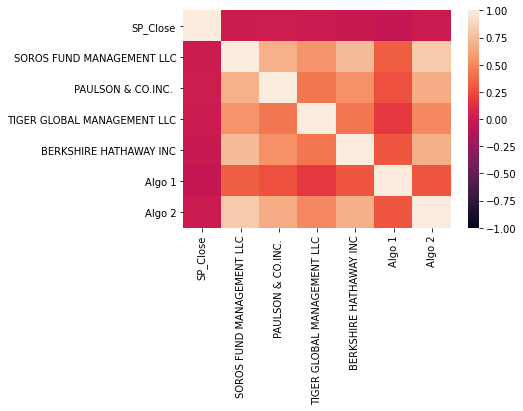

In [35]:
correlation_heat_map =sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculate covariance of a single portfolio
covariance_of_BERKSHIRE_HATHAWAY_INC = combined_data["BERKSHIRE HATHAWAY INC"].cov

# Calculate variance of S&P 500
variance_of_SP = combined_data['Close'].var()

# Computing beta
BERKSHIRE_HATHAWAY_INC_beta = covariance_of_BERKSHIRE_HATHAWAY_INC / variance_of_SP
BERKSHIRE_HATHAWAY_INC_beta

# Plot beta trend
BERKSHIRE_HATHAWAY_INC_beta.plot(figsize=(20,10))

KeyError: 'Close'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [37]:
# Use `ewm` to calculate the rolling window

times = ['2015-03-02', '2015-03-27']
combined_data.ewm(halflife="21 days", times=pd.DatetimeIndex(times)).mean()



ValueError: times must be the same length as the object.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
#Anualized Sharpe Ratios

S_P = ((combined_data.mean()*252)/combined_data.std()*np.sqrt(252))
S_P

SP_Close                      -130.682708
SOROS FUND MANAGEMENT LLC       86.409176
PAULSON & CO.INC.             -123.838434
TIGER GLOBAL MANAGEMENT LLC    -32.806958
BERKSHIRE HATHAWAY INC         152.899121
Algo 1                         345.136425
Algo 2                         122.052242
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

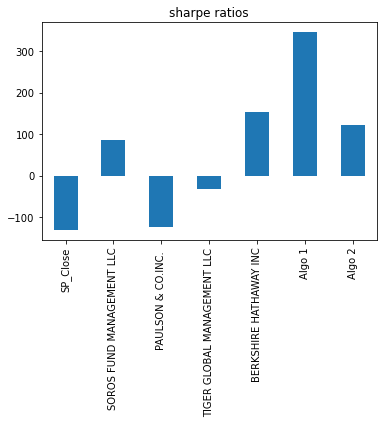

In [39]:
# Visualize the sharpe ratios as a bar plot
S_P.plot(kind="bar", title="sharpe ratios")



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [40]:
# Reading data from 21st stock
import yfinance as yf
ko = yf.Ticker("KO")
#print(ko.info)
data_ko = ko.history(period = "300d")
data_ko["Coca_Close_Price"]=data_ko["Close"]
Data_ko=data_ko.drop(["Close","Volume","Dividends","Stock Splits","Open","High","Low"], axis=1)

Data_ko

,Coca_Close_Price
Date,
2020-01-09,53.067192
2020-01-10,53.249378
2020-01-13,53.824741
2020-01-14,53.700081
2020-01-15,54.371338
...,...
2021-03-12,50.360001
2021-03-15,51.029999
2021-03-16,51.220001


In [41]:
# Reading data from 2nd stock
pfe = yf.Ticker("PFE")
#print(ko.info)
data_pfe = pfe.history(period = "300d")
data_pfe["Pfizer_Close_Price"]=data_pfe["Close"]
Data_pfe=data_pfe.drop(["Close","Volume","Dividends","Stock Splits","Open","High","Low"], axis=1)

Data_pfe


,Pfizer_Close_Price
Date,
2020-01-09,35.067936
2020-01-10,35.608967
2020-01-13,35.536827
2020-01-14,36.131962
2020-01-15,36.672997
...,...
2021-03-12,34.939999
2021-03-15,35.410000
2021-03-16,35.830002


In [42]:
# Reading data from 3rd stock
aapl = yf.Ticker("AAPL")
#print(ko.info)
data_aapl = aapl.history(period = "300d")

data_aapl["Apple_Close_Price"]=data_aapl["Close"]
Data_aapl=data_aapl.drop(["Close","Volume","Dividends","Stock Splits","Open","High","Low"], axis=1)

Data_aapl
#print(data_aapl)

,Apple_Close_Price
Date,
2020-01-09,76.630219
2020-01-10,76.803459
2020-01-13,78.444321
2020-01-14,77.385063
2020-01-15,77.053429
...,...
2021-03-12,121.029999
2021-03-15,123.989998
2021-03-16,125.570000


In [43]:
# Combine all stocks in a single DataFrame
combined_data_stock = pd.concat([Data_ko,Data_pfe, Data_aapl ], axis = 'columns', join = "inner")
combined_data_stock

,Coca_Close_Price,Pfizer_Close_Price,Apple_Close_Price
Date,,,
2020-01-09,53.067192,35.067936,76.630219
2020-01-10,53.249378,35.608967,76.803459
2020-01-13,53.824741,35.536827,78.444321
2020-01-14,53.700081,36.131962,77.385063
2020-01-15,54.371338,36.672997,77.053429
...,...,...,...
2021-03-12,50.360001,34.939999,121.029999
2021-03-15,51.029999,35.410000,123.989998
2021-03-16,51.220001,35.830002,125.570000


# Reset Date index
#combined_data_stocks = combined_data_stocks.set_index("Date")
 # Alredy Set

In [44]:
# Reorganize portfolio data by having a column per symbol


""""combined_data_stock.columns = pd.MultiIndex.from_tuples(zip(["KO_STOCK"," "," "," "," "," "," ","PFE_STOCK"," "," "," "," "," "," ","AAPL_STOCK"," "," "," "," "," "," "],combined_data_stock.columns))
#daily_return_stocks_h = pd.DataFrame({'ko':["Open" , "High", "Low", "Close", "Volume", "Dividends" , "Stock" , "Splits"]}) """

# The above code used to organize the portofolio column. Since i aready removed the unwanted  information i dont need to "Reorganize"
combined_data_stock

,Coca_Close_Price,Pfizer_Close_Price,Apple_Close_Price
Date,,,
2020-01-09,53.067192,35.067936,76.630219
2020-01-10,53.249378,35.608967,76.803459
2020-01-13,53.824741,35.536827,78.444321
2020-01-14,53.700081,36.131962,77.385063
2020-01-15,54.371338,36.672997,77.053429
...,...,...,...
2021-03-12,50.360001,34.939999,121.029999
2021-03-15,51.029999,35.410000,123.989998
2021-03-16,51.220001,35.830002,125.570000


In [45]:
# Calculate daily returns
combined_data_stock=combined_data_stock.pct_change() # daily return using the close price
combined_data_stock


# Drop NAs
combined_data_stock_na = combined_data_stock.dropna()

# Display sample data
combined_data_stock_na

#combined_data_stocks_na["Close","Close","Close"]=combined_data_stocks_na["KOP","PFEP","AAPLP"]

,Coca_Close_Price,Pfizer_Close_Price,Apple_Close_Price
Date,,,
2020-01-10,0.003433,0.015428,0.002261
2020-01-13,0.010805,-0.002026,0.021364
2020-01-14,-0.002316,0.016747,-0.013503
2020-01-15,0.012500,0.014974,-0.004286
2020-01-16,0.002116,-0.001475,0.012526
...,...,...,...
2021-03-12,-0.001982,0.006626,-0.007625
2021-03-15,0.013304,0.013452,0.024457
2021-03-16,0.003723,0.011861,0.012743


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [46]:
# Set weights
#cumulative_return = (1 + All_Return_data).cumprod()
#cumulative_return.plot(figsize=(20,10))

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_data_stocks_return=combined_data_stock_na.dot(weights)

# Display sample data
combined_data_stocks_return

Date
2020-01-10    0.007041
2020-01-13    0.010048
2020-01-14    0.000309
2020-01-15    0.007729
2020-01-16    0.004389
                ...   
2021-03-12   -0.000994
2021-03-15    0.017071
2021-03-16    0.009442
2021-03-17   -0.002392
2021-03-18   -0.015847
Length: 299, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [47]:
# Join your returns DataFrame to the original returns DataFrame
combined_data_stocks_portofolio_return = pd.concat([combined_data_stocks_return, combined_data_stock_na], axis = 'columns', join = "inner")
#combined_data_stocks_portofolio_return["Portofolio_Return"]=combined_data_stocks_portofolio_return[" "]
combined_data_stocks_portofolio_return.sort_index(inplace=True)
combined_data_stocks_portofolio_return.columns = ["combined_data_stocks_return","Coca_Close_Price","Pfizer_Close_Price","Apple_Close_Price"]
combined_data_stocks_portofolio_return.head()

,combined_data_stocks_return,Coca_Close_Price,Pfizer_Close_Price,Apple_Close_Price
Date,,,,
2020-01-10,0.007041,0.003433,0.015428,0.002261
2020-01-13,0.010048,0.010805,-0.002026,0.021364
2020-01-14,0.000309,-0.002316,0.016747,-0.013503
2020-01-15,0.007729,0.012500,0.014974,-0.004286
2020-01-16,0.004389,0.002116,-0.001475,0.012526


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data_stocks_portofolio_return_na= combined_data_stocks_portofolio_return.dropna()
combined_data_stocks_portofolio_return_na.head()

,combined_data_stocks_return,Coca_Close_Price,Pfizer_Close_Price,Apple_Close_Price
Date,,,,
2020-01-10,0.007041,0.003433,0.015428,0.002261
2020-01-13,0.010048,0.010805,-0.002026,0.021364
2020-01-14,0.000309,-0.002316,0.016747,-0.013503
2020-01-15,0.007729,0.012500,0.014974,-0.004286
2020-01-16,0.004389,0.002116,-0.001475,0.012526


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized `std`
daily_standard_deviations_of_all_stocks=combined_data_stocks_portofolio_return_na.std()
anaul_std_stocks = daily_standard_deviations_of_all_stocks*np.sqrt(252)
print(anaul_std_stocks)



combined_data_stocks_return    0.308340
Coca_Close_Price               0.329187
Pfizer_Close_Price             0.334326
Apple_Close_Price              0.451968
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

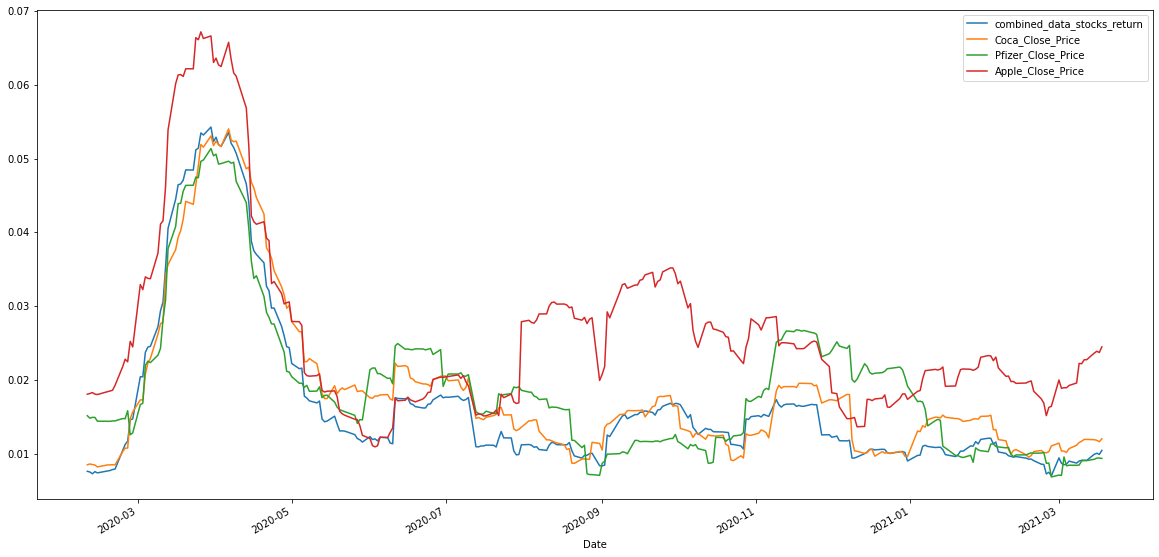

In [50]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_stocs_21=combined_data_stocks_portofolio_return_na.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_stocs_21.plot(figsize=(20,10))


### Calculate and plot the correlation

<AxesSubplot:>

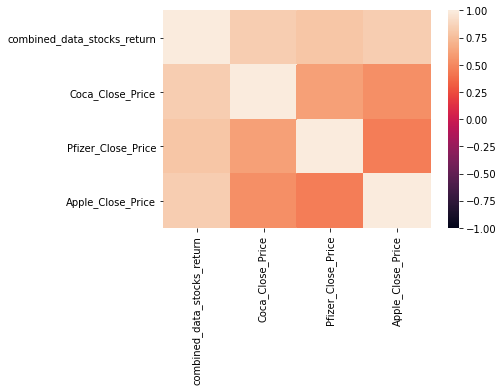

In [51]:
# Calculate and plot the correlation
# Calculate the correlation
correlation = combined_data_stocks_portofolio_return_na.corr()
# Display de correlation matrix
correlation
sns.heatmap(correlation, vmin=-1 , vmax =1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

            Apple_Close_Price  Coca_Close_Price  Pfizer_Close_Price  SP_Close  \
Date                                                                            
2012-10-01                NaN               NaN                 NaN       NaN   
2012-10-02                NaN               NaN                 NaN       NaN   
2012-10-03                NaN               NaN                 NaN       NaN   
2012-10-04                NaN               NaN                 NaN       NaN   
2012-10-05                NaN               NaN                 NaN       NaN   
...                       ...               ...                 ...       ...   
2021-03-12                NaN               NaN                 NaN       NaN   
2021-03-15                NaN               NaN                 NaN       NaN   
2021-03-16                NaN               NaN                 NaN       NaN   
2021-03-17                NaN               NaN                 NaN       NaN   
2021-03-18                Na

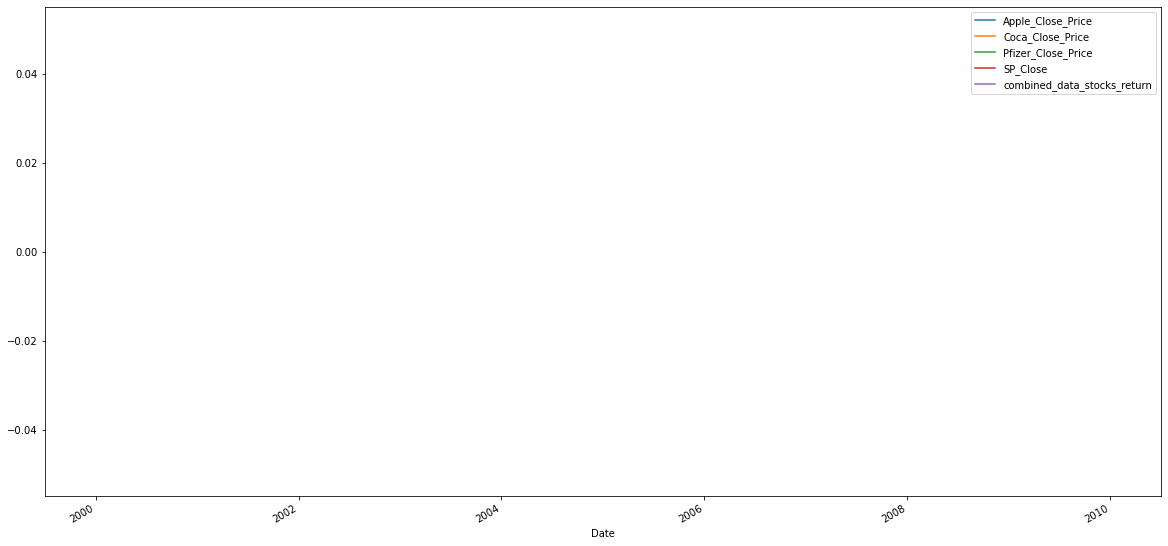

In [52]:

# Calculate and plot Beta correlation
# Calculate covariance of a single portfolio
covariance_of_portfolio = combined_data_stocks_portofolio_return_na.rolling(window=60).cov(daily_return_pct_sp) # daily_return_pct_sp from s&p 500 returns
covariance_of_portfolio.plot(figsize=(20,10))

print(covariance_of_portfolio)



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Calculate Annualzied Sharpe Ratio
annual_sharp_ratio =(( combined_data_stocks_portofolio_return_na.mean()-combined_data_stocks_portofolio_return_na.mean())*252)/(combined_data_stocks_portofolio_return_na.std()*np.sqrt(252))
annual_sharp_ratio


combined_data_stocks_return    0.0
Coca_Close_Price               0.0
Pfizer_Close_Price             0.0
Apple_Close_Price              0.0
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

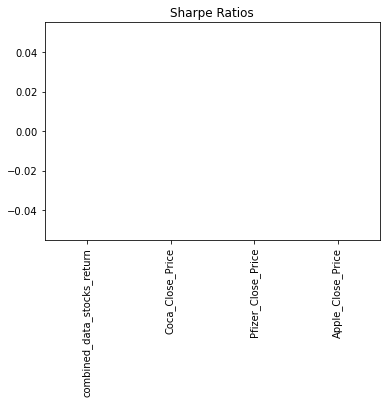

In [54]:
# Visualize the sharpe ratios as a bar plot
annual_sharp_ratio.plot(kind="bar", title ="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

### I don't know why I am not geting a result for the Sharpe ratio and rolling 60-day beta. Annualized Standard Deviation of Apple looks higher than the two stocks, which shows that Apple is more volatile. The combination of the three stocks are very good. There is growth in Apple and value in coca-cola and Pfizer. 